In [1]:
import pandas as pd

# Set the path to the file you'd like to load
file_path = "/kaggle/input/cicapt-iiot/phase1_NetworkData.csv"

# Load the latest version
df = pd.read_csv(file_path)

print("First 5 records:", df.head())

First 5 records:              ts  flow_duration  Header_Length      Source IP Destination IP  \
0  1.701426e+09       0.000000             66  172.16.64.128  172.16.66.128   
1  1.701426e+09       0.002112            132  172.16.64.128  172.16.66.128   
2  1.701426e+09       0.002328            198  172.16.64.128  172.16.66.128   
3  1.701426e+09       0.004329            264  172.16.64.128  172.16.66.128   
4  1.701426e+09       0.009495            330  172.16.64.128  172.16.66.128   

   Source Port  Destination Port  Protocol Type Protocol_name  Duration  ...  \
0        41750               502              6           TCP        64  ...   
1        41750               502              6           TCP        64  ...   
2        41750               502              6           TCP        64  ...   
3        41750               502              6           TCP        64  ...   
4        41750               502              6           TCP        64  ...   

   Weight  DS status  Fragm

In [2]:
# Assuming df is your DataFrame
print("Number of classes for each label:")
print("label:", df['label'].nunique())
print("subLabel:", df['subLabel'].nunique())
print("subLabelCat:", df['subLabelCat'].nunique())

print("\nUnique values for each label:")
print("label:", df['label'].unique())
print("subLabel:", df['subLabel'].unique())
print("subLabelCat:", df['subLabelCat'].unique())


Number of classes for each label:
label: 1
subLabel: 1
subLabelCat: 1

Unique values for each label:
label: [0]
subLabel: [0]
subLabelCat: [0]


In [3]:
# Count occurrences of label 0 and label 1
label_counts = df['label'].value_counts()

print("Number of examples for each label:")
print("Label 0:", label_counts.get(0, 0))
print("Label 1:", label_counts.get(1, 0))

Number of examples for each label:
Label 0: 12062396
Label 1: 0


In [4]:
def get_sample_values(col, n=3):
    return list(df[col].dropna().unique()[:n])

info_df = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Null Count': df.isnull().sum(),
    'Sample Values': [get_sample_values(col) for col in df.columns]
})

with pd.option_context("display.max_rows", None, "display.max_colwidth", 100):
    display(info_df[['Column', 'Data Type', 'Null Count', 'Sample Values']])

,Column,Data Type,Null Count,Sample Values
ts,ts,float64,0,"[1701426437.323588, 1701426437.3257, 1701426437.325916]"
flow_duration,flow_duration,float64,0,"[0.0, 0.0021121501922607, 0.0023281574249267]"
Header_Length,Header_Length,int64,0,"[66, 132, 198]"
Source IP,Source IP,object,0,"[172.16.64.128, 172.16.66.128, 172.16.63.128]"
Destination IP,Destination IP,object,0,"[172.16.66.128, 172.16.64.128, 172.16.63.128]"
Source Port,Source Port,int64,0,"[41750, 502, 1883]"
Destination Port,Destination Port,int64,0,"[502, 41750, 56837]"
Protocol Type,Protocol Type,int64,0,"[6, 17, 0]"
Protocol_name,Protocol_name,object,0,"[TCP, UDP, ARP]"
Duration,Duration,int64,0,"[64, 63, 127]"


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from typing import Tuple, Optional

class CICAPTPreprocessor:
    def __init__(self, random_state: int = 42):
        self.random_state = random_state

    def load_and_preprocess_data(
        self,
        benign_path: str,
        malicious_path: str,
        output_csv_path: Optional[str] = None,
        benign_sample_size: int = 10000,
        stratify_by: str = "Protocol_name"  # Key column for stratified sampling
    ) -> Tuple[pd.DataFrame, np.ndarray]:
        """
        Load benign/malicious data, sample benign traffic stratified by a key column,
        combine into a balanced dataset, and optionally save to CSV.

        Args:
            benign_path: Path to benign traffic CSV.
            malicious_path: Path to malicious traffic CSV.
            output_csv_path: If provided, save the final dataset here.
            benign_sample_size: Number of benign samples to keep.
            stratify_by: Column name for stratified sampling (e.g., "Protocol_name").

        Returns:
            Tuple of (features, labels) where features is a DataFrame.
        """
        # Load data
        benign_df = pd.read_csv(benign_path)
        malicious_df = pd.read_csv(malicious_path)

        # Filter labels (assuming 0=benign, 1=malicious)
        benign_data = benign_df[benign_df['label'] == 0]
        malicious_data = malicious_df[malicious_df['label'] == 1]

        print(f"Raw counts - Benign: {len(benign_data)}, Malicious: {len(malicious_data)}")

        # Stratified sampling of benign traffic
        if len(benign_data) > benign_sample_size:
            benign_data = self._stratified_sample(
                df=benign_data,
                stratify_col=stratify_by,
                n_samples=benign_sample_size
            )

        # Combine datasets
        combined_data = pd.concat([benign_data, malicious_data], ignore_index=True)
        X = combined_data.drop(columns=['label'])
        y = combined_data['label'].values  # Already numeric (0/1)

        # Save to CSV if requested
        if output_csv_path:
            combined_data.to_csv(output_csv_path, index=False)
            print(f"Saved preprocessed dataset to {output_csv_path}")

        print(f"Final dataset: {len(combined_data)} samples")
        print(f"Class distribution: {pd.Series(y).value_counts().to_dict()}")

        return X, y

    def _stratified_sample(
        self,
        df: pd.DataFrame,
        stratify_col: str,
        n_samples: int
    ) -> pd.DataFrame:
        """
        Stratified sampling to preserve the distribution of `stratify_col`.
        """
        # Group by the stratification column and sample proportionally
        groups = df.groupby(stratify_col, group_keys=False)
        sampled_df = groups.apply(lambda x: x.sample(
            min(len(x), int(n_samples * len(x) / len(df))),
            random_state=self.random_state
        ))

        # If total samples < n_samples due to rounding, add random samples
        if len(sampled_df) < n_samples:
            remaining_samples = n_samples - len(sampled_df)
            extra_samples = df.drop(sampled_df.index).sample(
                n=remaining_samples,
                random_state=self.random_state
            )
            sampled_df = pd.concat([sampled_df, extra_samples])

        return sampled_df

    def split_data(
        self,
        X: pd.DataFrame,
        y: np.ndarray,
        test_size: float = 0.2
    ) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """
        Stratified train-test split.
        """
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=test_size,
            stratify=y,
            random_state=self.random_state
        )
        print(f"Train: {len(y_train)} samples | Test: {len(y_test)} samples")
        return X_train, X_test, y_train, y_test

In [2]:
preprocessor = CICAPTPreprocessor(random_state=42)

# Load, sample, and save data
X, y = preprocessor.load_and_preprocess_data(
    benign_path="/kaggle/input/cicapt-iiot/phase1_NetworkData.csv",
    malicious_path="/kaggle/input/cicapt-iiot/phase2_NetworkData.csv",
    output_csv_path="/kaggle/working/preprocessed_dataset.csv",
    stratify_by="Protocol_name",  # Or "Source Port", "Protocol Type", etc.
    benign_sample_size=100_000
)

# Split into train/test
# X_train, X_test, y_train, y_test = preprocessor.split_data(X, y, test_size=0.2)

/tmp/ipykernel_31/788030926.py:34: DtypeWarning: Columns (68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  malicious_df = pd.read_csv(malicious_path)


Raw counts - Benign: 12062396, Malicious: 1004


/tmp/ipykernel_31/788030926.py:76: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = groups.apply(lambda x: x.sample(


Saved preprocessed dataset to /kaggle/working/preprocessed_dataset.csv
Final dataset: 101004 samples
Class distribution: {0: 100000, 1: 1004}


Running Binary Classification Pipeline...
Starting binary classification pipeline...
Dataset shape: (101004, 70)
Target distribution:
label
0    100000
1      1004
Name: count, dtype: int64
Training set shape: (80803, 67)
Test set shape: (20201, 67)

Training Random Forest...
Random Forest - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000

Training Gradient Boosting...
Gradient Boosting - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000

Training Logistic Regression...
Logistic Regression - Accuracy: 0.9998, Precision: 1.0000, Recall: 0.9801, F1: 0.9899

Training SVM...
SVM - Accuracy: 1.0000, Precision: 1.0000, Recall: 0.9950, F1: 0.9975

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       1.00      1.00      1.00       201

    accuracy                           1.00     20201
   macro avg       1.00      1.00      1.00     20201
weighted av

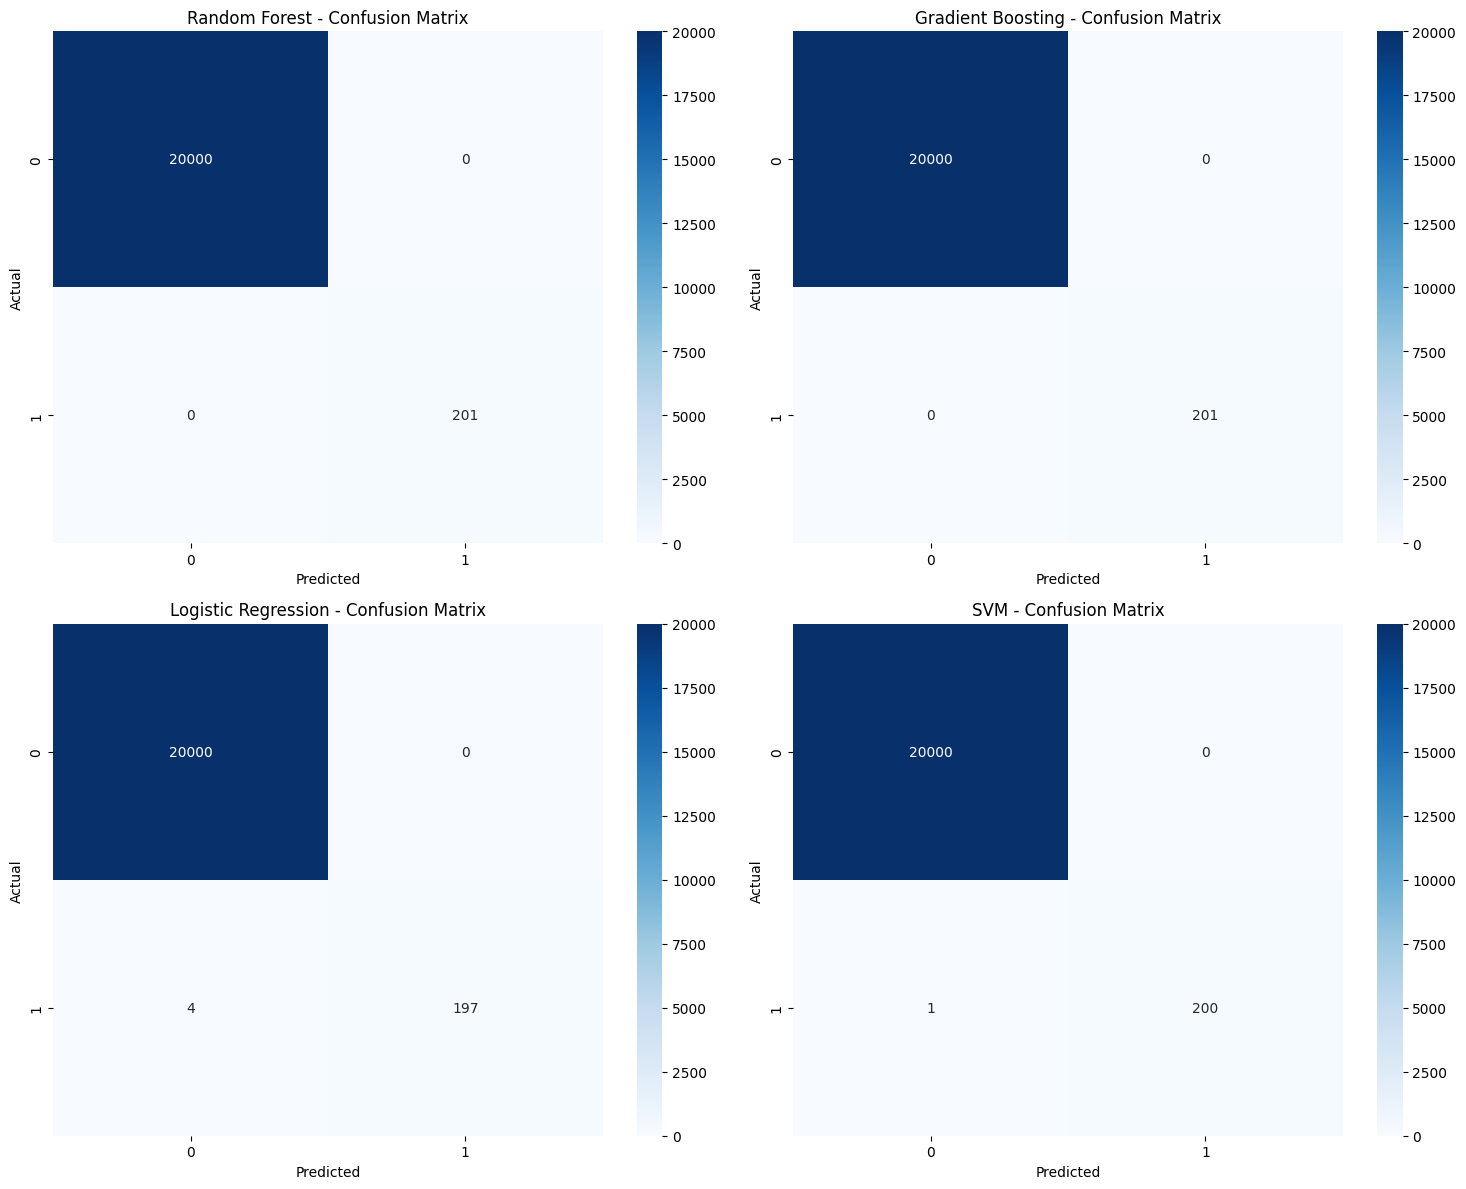


Model Performance Comparison
              Model  Accuracy  Precision  Recall  F1-Score
      Random Forest    1.0000     1.0000  1.0000    1.0000
  Gradient Boosting    1.0000     1.0000  1.0000    1.0000
                SVM    1.0000     1.0000  0.9950    0.9975
Logistic Regression    0.9998     1.0000  0.9801    0.9899


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, Optional, Dict, Any
import warnings
warnings.filterwarnings('ignore')

class CICAPTPreprocessor:
    def __init__(self, random_state: int = 42):
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.label_encoders = {}
        self.feature_columns = None
        
    def create_data(
        self,
        benign_path: str,
        malicious_path: str,
        output_csv_path: Optional[str] = None,
        benign_sample_size: int = 10000,
        stratify_by: str = "Protocol_name"
    ) -> Tuple[pd.DataFrame, np.ndarray]:
        """
        Load benign/malicious data, sample benign traffic stratified by a key column,
        combine into a balanced dataset, and optionally save to CSV.
        """
        # Load data
        benign_df = pd.read_csv(benign_path)
        malicious_df = pd.read_csv(malicious_path)
        
        # Filter labels (assuming 0=benign, 1=malicious)
        benign_data = benign_df[benign_df['label'] == 0]
        malicious_data = malicious_df[malicious_df['label'] == 1]
        
        print(f"Raw counts - Benign: {len(benign_data)}, Malicious: {len(malicious_data)}")
        
        # Stratified sampling of benign traffic
        if len(benign_data) > benign_sample_size:
            benign_data = self._stratified_sample(
                df=benign_data,
                stratify_col=stratify_by,
                n_samples=benign_sample_size
            )
        
        # Combine datasets
        combined_data = pd.concat([benign_data, malicious_data], ignore_index=True)
        X = combined_data.drop(columns=['label'])
        y = combined_data['label'].values
        
        # Save to CSV if requested
        if output_csv_path:
            combined_data.to_csv(output_csv_path, index=False)
            print(f"Saved preprocessed dataset to {output_csv_path}")
        
        print(f"Final dataset: {len(combined_data)} samples")
        print(f"Class distribution: {pd.Series(y).value_counts().to_dict()}")
        
        return X, y
    
    def _stratified_sample(
        self,
        df: pd.DataFrame,
        stratify_col: str,
        n_samples: int
    ) -> pd.DataFrame:
        """
        Stratified sampling to preserve the distribution of `stratify_col`.
        """
        # Group by the stratification column and sample proportionally
        groups = df.groupby(stratify_col, group_keys=False)
        sampled_df = groups.apply(lambda x: x.sample(
            min(len(x), int(n_samples * len(x) / len(df))),
            random_state=self.random_state
        ))
        
        # If total samples < n_samples due to rounding, add random samples
        if len(sampled_df) < n_samples:
            remaining_samples = n_samples - len(sampled_df)
            extra_samples = df.drop(sampled_df.index).sample(
                n=remaining_samples,
                random_state=self.random_state
            )
            sampled_df = pd.concat([sampled_df, extra_samples])
        
        return sampled_df
    
    def preprocess_features(self, X: pd.DataFrame, fit: bool = True) -> pd.DataFrame:
        """
        Apply preprocessing pipeline to features.
        
        Args:
            X: Input features DataFrame
            fit: Whether to fit the preprocessing steps (True for training, False for test)
        
        Returns:
            Preprocessed features DataFrame
        """
        X_processed = X.copy()
        
        # Define categorical and numerical columns based on the dataset structure
        categorical_cols = ['Source IP', 'Destination IP', 'Protocol_name']
        
        # Handle categorical columns with label encoding
        for col in categorical_cols:
            if col in X_processed.columns:
                if fit:
                    # Fit label encoder
                    le = LabelEncoder()
                    X_processed[col] = le.fit_transform(X_processed[col].astype(str))
                    self.label_encoders[col] = le
                else:
                    # Transform using fitted encoder
                    if col in self.label_encoders:
                        # Handle unseen categories
                        le = self.label_encoders[col]
                        X_processed[col] = X_processed[col].astype(str)
                        # Map unseen categories to a default value
                        mask = ~X_processed[col].isin(le.classes_)
                        X_processed.loc[mask, col] = le.classes_[0]  # Use first class as default
                        X_processed[col] = le.transform(X_processed[col])
        
        # Remove any remaining non-numeric columns and target columns
        columns_to_drop = ['label', 'subLabel', 'subLabelCat']
        X_processed = X_processed.drop(columns=[col for col in columns_to_drop if col in X_processed.columns])
        
        # Handle missing values
        X_processed = X_processed.fillna(X_processed.mean())
        
        # Store feature columns for consistency
        if fit:
            self.feature_columns = X_processed.columns.tolist()
        
        # Ensure consistent columns
        if self.feature_columns:
            # Add missing columns with zeros
            for col in self.feature_columns:
                if col not in X_processed.columns:
                    X_processed[col] = 0
            # Reorder columns to match training
            X_processed = X_processed[self.feature_columns]
        
        # Scale features
        if fit:
            X_scaled = self.scaler.fit_transform(X_processed)
        else:
            X_scaled = self.scaler.transform(X_processed)
        
        return pd.DataFrame(X_scaled, columns=X_processed.columns)


class MLClassificationPipeline:
    def __init__(self, random_state: int = 42):
        self.random_state = random_state
        self.preprocessor = CICAPTPreprocessor(random_state=random_state)
        self.models = {}
        self.results = {}
        
    def initialize_models(self):
        """Initialize ML models for classification."""
        self.models = {
            'Random Forest': RandomForestClassifier(
                n_estimators=100, 
                random_state=self.random_state,
                n_jobs=-1
            ),
            'Gradient Boosting': GradientBoostingClassifier(
                n_estimators=100,
                random_state=self.random_state
            ),
            'Logistic Regression': LogisticRegression(
                random_state=self.random_state,
                max_iter=1000
            ),
            'SVM': SVC(
                random_state=self.random_state,
                probability=True
            )
        }
    
    def prepare_data(self, X: pd.DataFrame, target_col: str = 'label') -> Tuple[pd.DataFrame, pd.DataFrame, np.ndarray, np.ndarray]:
        """
        Prepare data for training and testing.
        
        Args:
            X: Input DataFrame with features and target
            target_col: Target column name ('label' for binary, 'subLabel' for multiclass)
        
        Returns:
            X_train, X_test, y_train, y_test
        """
        # Extract target variable
        y = X[target_col].values
        X_features = X.drop(columns=[target_col])
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_features, y, 
            test_size=0.2, 
            random_state=self.random_state,
            stratify=y
        )
        
        # Apply preprocessing
        X_train_processed = self.preprocessor.preprocess_features(X_train, fit=True)
        X_test_processed = self.preprocessor.preprocess_features(X_test, fit=False)
        
        return X_train_processed, X_test_processed, y_train, y_test
    
    def train_and_evaluate(self, X_train: pd.DataFrame, X_test: pd.DataFrame, 
                          y_train: np.ndarray, y_test: np.ndarray, 
                          classification_type: str = 'binary') -> Dict[str, Any]:
        """
        Train and evaluate all models.
        
        Args:
            X_train, X_test, y_train, y_test: Training and test data
            classification_type: 'binary' or 'multiclass'
        
        Returns:
            Dictionary with results for each model
        """
        results = {}
        
        for model_name, model in self.models.items():
            print(f"\nTraining {model_name}...")
            
            # Train model
            model.fit(X_train, y_train)
            
            # Make predictions
            y_pred = model.predict(X_test)
            
            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            
            # Handle different averaging strategies based on classification type
            if classification_type == 'binary':
                precision = precision_score(y_test, y_pred, average='binary')
                recall = recall_score(y_test, y_pred, average='binary')
                f1 = f1_score(y_test, y_pred, average='binary')
            else:
                precision = precision_score(y_test, y_pred, average='weighted')
                recall = recall_score(y_test, y_pred, average='weighted')
                f1 = f1_score(y_test, y_pred, average='weighted')
            
            # Store results
            results[model_name] = {
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1_score': f1,
                'predictions': y_pred,
                'model': model
            }
            
            print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, "
                  f"Recall: {recall:.4f}, F1: {f1:.4f}")
        
        return results
    
    def plot_confusion_matrices(self, results: Dict[str, Any], y_test: np.ndarray, 
                               classification_type: str = 'binary'):
        """
        Plot confusion matrices for all models.
        """
        n_models = len(results)
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.ravel()
        
        for idx, (model_name, result) in enumerate(results.items()):
            cm = confusion_matrix(y_test, result['predictions'])
            
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                       ax=axes[idx], cbar=True)
            axes[idx].set_title(f'{model_name} - Confusion Matrix')
            axes[idx].set_xlabel('Predicted')
            axes[idx].set_ylabel('Actual')
        
        plt.tight_layout()
        plt.show()
    
    def print_classification_reports(self, results: Dict[str, Any], y_test: np.ndarray):
        """
        Print detailed classification reports for all models.
        """
        for model_name, result in results.items():
            print(f"\n{'='*50}")
            print(f"Classification Report - {model_name}")
            print(f"{'='*50}")
            print(classification_report(y_test, result['predictions']))
    
    def compare_models(self, results: Dict[str, Any]) -> pd.DataFrame:
        """
        Create a comparison DataFrame of all model performances.
        """
        comparison_data = []
        
        for model_name, result in results.items():
            comparison_data.append({
                'Model': model_name,
                'Accuracy': result['accuracy'],
                'Precision': result['precision'],
                'Recall': result['recall'],
                'F1-Score': result['f1_score']
            })
        
        comparison_df = pd.DataFrame(comparison_data)
        comparison_df = comparison_df.sort_values('F1-Score', ascending=False)
        
        return comparison_df
    
    def run_full_pipeline(self, data_path: str, target_col: str = 'label', 
                         classification_type: str = 'binary'):
        """
        Run the complete ML pipeline.
        
        Args:
            data_path: Path to the dataset CSV
            target_col: Target column name ('label' for binary, 'subLabel' for multiclass)
            classification_type: 'binary' or 'multiclass'
        """
        print(f"Starting {classification_type} classification pipeline...")
        
        # Load data
        data = pd.read_csv(data_path)
        print(f"Dataset shape: {data.shape}")
        print(f"Target distribution:\n{data[target_col].value_counts()}")
        
        # Initialize models
        self.initialize_models()
        
        # Prepare data
        X_train, X_test, y_train, y_test = self.prepare_data(data, target_col)
        print(f"Training set shape: {X_train.shape}")
        print(f"Test set shape: {X_test.shape}")
        
        # Train and evaluate models
        results = self.train_and_evaluate(X_train, X_test, y_train, y_test, classification_type)
        
        # Print detailed results
        self.print_classification_reports(results, y_test)
        
        # Plot confusion matrices
        self.plot_confusion_matrices(results, y_test, classification_type)
        
        # Compare models
        comparison_df = self.compare_models(results)
        print(f"\n{'='*50}")
        print("Model Performance Comparison")
        print(f"{'='*50}")
        print(comparison_df.to_string(index=False, float_format='%.4f'))
        
        # Store results
        self.results[classification_type] = results
        
        return results, comparison_df


# Example usage
if __name__ == "__main__":
    # Initialize pipeline
    pipeline = MLClassificationPipeline(random_state=42)
    
    # For binary classification
    print("Running Binary Classification Pipeline...")
    binary_results, binary_comparison = pipeline.run_full_pipeline(
        data_path='/kaggle/working/preprocessed_dataset.csv',  # Replace with your actual dataset path
        target_col='label',
        classification_type='binary'
    )
    
    # For multiclass classification
    # print("\n" + "="*80)
    # print("Running Multiclass Classification Pipeline...")
    # multiclass_results, multiclass_comparison = pipeline.run_full_pipeline(
    #     data_path='your_dataset.csv',  # Replace with your actual dataset path
    #     target_col='subLabel',
    #     classification_type='multiclass'
    # )
    
    # # Save results
    # binary_comparison.to_csv('binary_classification_results.csv', index=False)
    # multiclass_comparison.to_csv('multiclass_classification_results.csv', index=False)
    
    # print("\nPipeline completed successfully!")